In [0]:
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.10018.jpg     
  inflatin

In [0]:
import matplotlib.pyplot as plt
import cv2
dog_img = cv2.imread('./train/dog.6281.jpg')
cat_img = cv2.imread('./train/cat.6361.jpg')

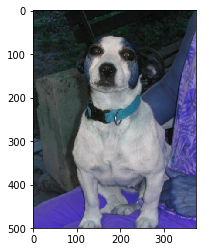

In [0]:
plt.imshow(dog_img)

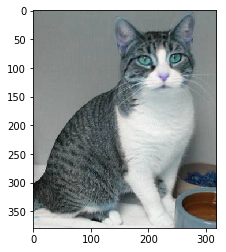

In [0]:
plt.imshow(cat_img)

# Creating Dataloader

In [0]:
#Creating list with labels
import pandas as pd
filenames = os.listdir('./train')
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'dog':
    categories.append('dog')
  else:
    categories.append('cat')
        
    
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [0]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size = 0.2)

In [0]:
#Class for image data generator
from keras.preprocessing.image import ImageDataGenerator

#We need to normalize image
datagen = ImageDataGenerator(rescale=1./255)
traingenerator = datagen.flow_from_dataframe( train_df , './train',x_col = 'filename' , y_col = 'category', target_size = (224,224) ,class_mode='categorical', batch_size = 32)
testgenerator = datagen.flow_from_dataframe( test_df , './train',x_col = 'filename' , y_col = 'category', target_size = (224,224) ,class_mode='categorical', batch_size = 32)

Using TensorFlow backend.


Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 106, 106, 64)      51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 49, 49, 128)       204928    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 256)      

In [0]:
history = model.fit_generator(
    traingenerator, 
    epochs=20,
    validation_data = testgenerator,
    validation_steps= len(testgenerator),
    steps_per_epoch = len(traingenerator)
)

Epoch 1/20
625/625 [==============================] - 114s 183ms/step - loss: 0.6527 - acc: 0.6200 - val_loss: 0.6858 - val_acc: 0.6306
Epoch 2/20
625/625 [==============================] - 112s 180ms/step - loss: 0.5626 - acc: 0.7148 - val_loss: 0.4891 - val_acc: 0.7696
Epoch 3/20
625/625 [==============================] - 112s 180ms/step - loss: 0.4707 - acc: 0.7845 - val_loss: 0.4724 - val_acc: 0.7738
Epoch 4/20
625/625 [==============================] - 112s 179ms/step - loss: 0.3798 - acc: 0.8330 - val_loss: 0.4222 - val_acc: 0.8056
Epoch 5/20
625/625 [==============================] - 113s 180ms/step - loss: 0.3118 - acc: 0.8676 - val_loss: 0.2707 - val_acc: 0.8864
Epoch 6/20
625/625 [==============================] - 111s 178ms/step - loss: 0.2450 - acc: 0.8970 - val_loss: 0.3307 - val_acc: 0.8570
Epoch 7/20
625/625 [==============================] - 111s 178ms/step - loss: 0.1984 - acc: 0.9184 - val_loss: 0.3923 - val_acc: 0.8254
Epoch 8/20
625/625 [============================

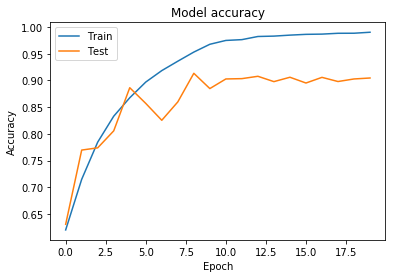

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

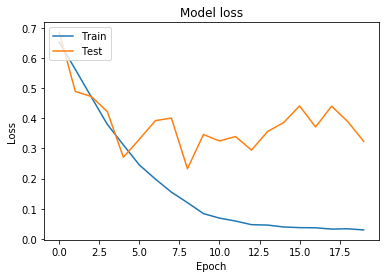

In [0]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [0]:
# Encoder dictionary created by keras
traingenerator.class_indices

{'cat': 0, 'dog': 1}

In [0]:
labels = (traingenerator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cat', 1: 'dog'}


In [0]:
import numpy as np

def img_show(image):
  b,g,r = cv2.split(image)
  image = cv2.merge((r,g,b))
  plt.imshow(image)
  plt.show()
  return image

def test(model,image_path):
  img = cv2.imread(image_path)
  img = img_show(img)
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,(1,224,224,3))
  img = img/255.0
  prediction = model.predict(img)
  prediction = np.argmax(prediction)
  labels = (traingenerator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  return labels[prediction]

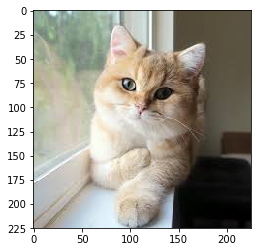

predicted label is: cat


In [0]:
#Upload your own image and give path in path variable
path = '/content/download.jfif'
print('predicted label is:' , test(model,path))